# Plotting polygon Shapefiles on a Matplotlib Basemap with GeoPandas, Shapely and Descartes

__This notebook outlines an example processing Shapefile data with GeoPandas and then plotting it on a map using Basemap.__  
The idea for this notebook comes from a blog post on [Boreal Perspectives](https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/)

In [6]:
import geopandas as gp
import geoplot
florida = gp.read_file("zip://./data/County_Florida.zip")
florida.head()

,OBJECTID,NAME,MAPS_PUBGI,STFIPS,LASTUPDATE,LASTEDITOR,DEP_COUNTY,FIPS_COUNT,GlobalID,SHAPESTAre,SHAPESTLen,geometry
0,4,Bradford,1.584957e+06,12,2015-09-16T14:12:28.000Z,DP7D,4,7,{5DA1D14E-6097-4726-9764-057509044B63},8.368573e+09,552277.436031,POLYGON ((-82.12724524214778 30.14315139505032...
1,24,Hamilton,2.740593e+06,12,2015-09-16T14:14:45.000Z,DP7D,24,47,{A749C3B9-02E0-4E50-A9AE-0AA7C2FEFA0E},1.447033e+10,764491.689508,POLYGON ((-83.28527200554709 30.63307422217825...
2,57,Sumter,3.063681e+06,12,2015-09-16T14:18:57.000Z,DP7D,60,119,{0048618C-7DEA-4CDC-9D34-10C01B83558E},1.617624e+10,754485.060512,POLYGON ((-82.29476901989867 28.96039935465938...
3,7,Calhoun,3.038994e+06,12,2015-09-16T14:12:46.000Z,DP7D,7,13,{14948BA3-22FA-4DBE-A6E2-11AF11F5C4D1},1.604589e+10,629574.239439,POLYGON ((-84.93613171371241 30.60027541551352...
4,1,Alachua,5.116663e+06,12,2015-09-16T14:12:14.000Z,DP7D,1,1,{4C2F6CE8-A134-4681-BFAC-136034686166},2.701598e+10,905743.915304,POLYGON ((-82.52368779618217 29.94518681827692...


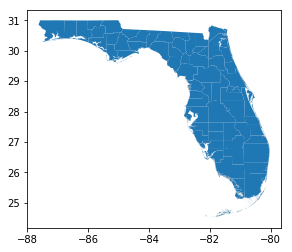

In [7]:
florida.plot()

In [13]:
import shapely
import matplotlib.pyplot as plt

In [49]:
studyarea = shapely.geometry.box(-81.67,27.1,-86.,28)
# the above could easily be done with filtering fips codes but the
# above shows the potential of shapely

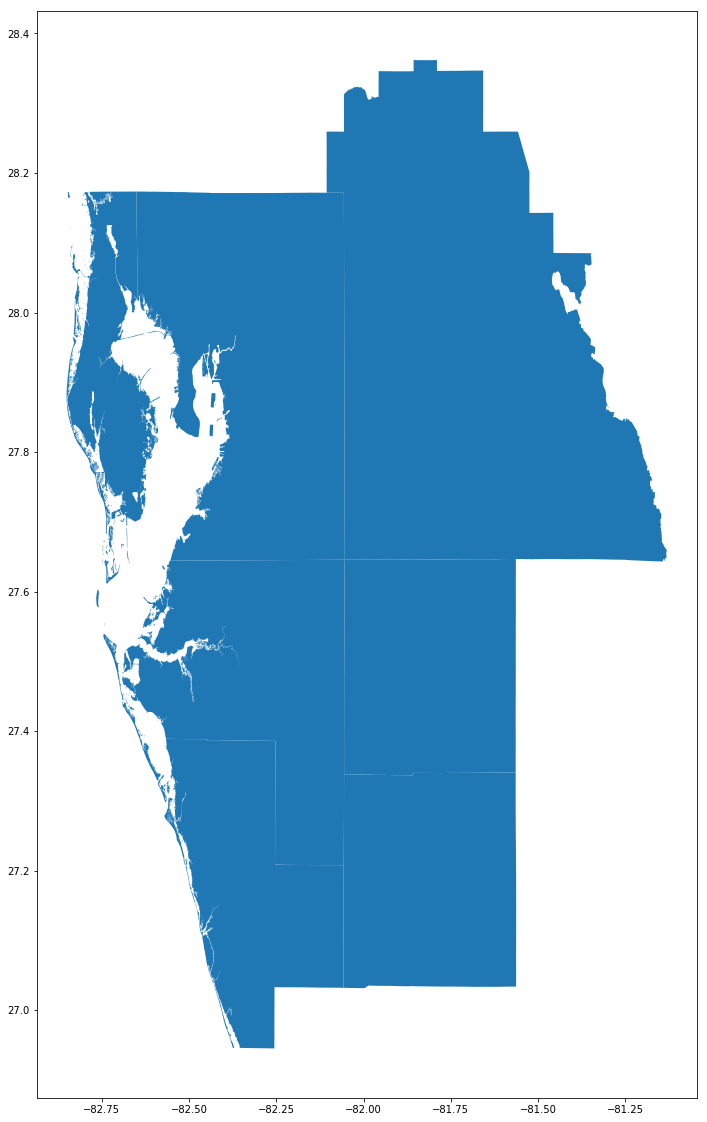

In [47]:
ax1 = florida[florida.geometry.intersects(studyarea)].plot()
ax1.set_aspect(2)
fig = plt.gcf()
fig.set_size_inches(20,20)

According to the author of the blog post, this is *as far as as we can get with GeoPandas alone.* 

For more sophisticated maps, enter __Basemap__. The Basemap module offers two major tools:

 - a Basemap class that represents a map in a pretty good selection of coordinate systems and is able to transform arbitrary (longitude, latitude) coordinate pairs into the map’s coordinates  
 - a rich database of country and state borders, water bodies, coast lines, all in multiple spatial resolutions

To install Basemap package:
`conda install -c conda-forge basemap`

In [50]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

***

__Try this for annotating the county names__ [GeoPandas Label Polygons](https://stackoverflow.com/questions/38899190/geopandas-label-polygons)

[Point in Polygon for GeoPandas](https://automating-gis-processes.github.io/2017/lessons/L3/point-in-polygon.html)